# Combining Data And Remove Outliers

## Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading the Data

In [2]:
mall_customers = pd.read_csv('Datasets/Mall_Customers.csv')

## Check the dimensions 

In [3]:
mall_customers.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
mall_customers.shape

(200, 5)

## Check the data types

In [5]:
mall_customers.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

## Summary of the data

In [6]:
mall_customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Check nulls

In [7]:
mall_customers.isnull().any()

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

## Check unique

In [8]:
mall_customers.nunique()

CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

## Plot historics

In [9]:
mall_customers.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<AxesSubplot:>

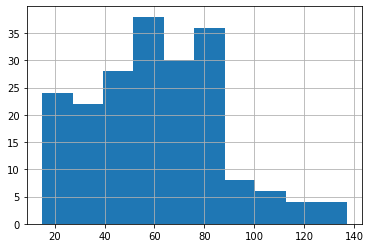

In [10]:
mall_customers['Annual Income (k$)'].hist()

## Outliers

### Boxplot for outliers

<AxesSubplot:>

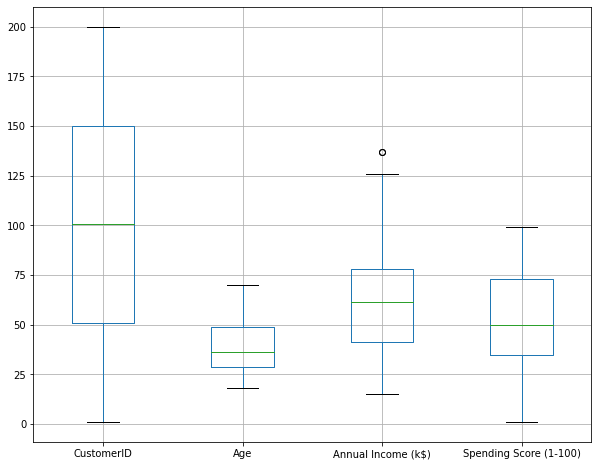

In [11]:
mall_customers.boxplot(figsize=(10,8))

### Plot column

<AxesSubplot:>

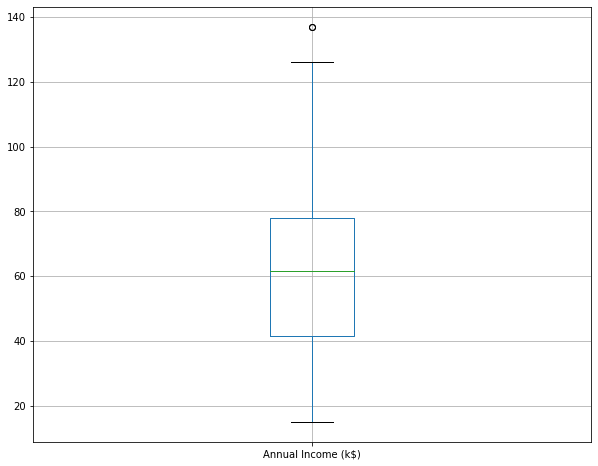

In [12]:
mall_customers.boxplot(figsize=(10,8),
                      column =['Annual Income (k$)'])

### Find who are the outliers customers 

In [13]:
mall_customers.loc[mall_customers['Annual Income (k$)'] > 125]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [14]:
q1 = mall_customers['Annual Income (k$)'].quantile(0.25)
q3 = mall_customers['Annual Income (k$)'].quantile(0.75)

In [15]:
print(q1, q3)

41.5 78.0


In [16]:
iqr = q3 - q1

In [17]:
print(iqr)

36.5


In [18]:
minimum = q1 - 1.5 * iqr
maximum = q3 + 1.5 * iqr

In [19]:
minimum, maximum

(-13.25, 132.75)

## Add  New column to indicate if is an outlier

In [20]:
mall_customers['Annual_Income_Outlier'] = False

In [21]:
mall_customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Annual_Income_Outlier
0,1,Male,19,15,39,False
1,2,Male,21,15,81,False
2,3,Female,20,16,6,False
3,4,Female,23,16,77,False
4,5,Female,31,17,40,False


In [22]:
for index, row in mall_customers.iterrows():
    if row['Annual Income (k$)'] > maximum:
        mall_customers.at[index, 'Annual_Income_Outlier'] = True

In [23]:
mall_customers.loc[mall_customers['Annual Income (k$)'] > maximum]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Annual_Income_Outlier
198,199,Male,32,137,18,True
199,200,Male,30,137,83,True


In [24]:
mall_customers['Annual_Income_Outlier'].sum()

2

In [25]:
mean = mall_customers['Annual Income (k$)'].mean()
mean

60.56

### Fix outliers

In [26]:
for index, row in mall_customers.iterrows():
    if row['Annual_Income_Outlier'] == True:
        mall_customers.at[index, 'Annual Income (k$)'] = mean

<AxesSubplot:>

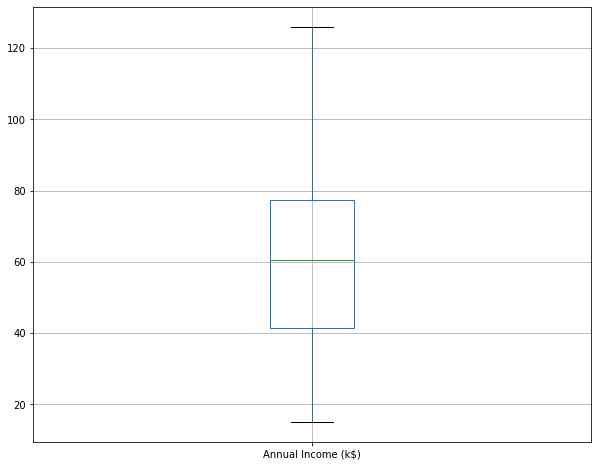

In [27]:
mall_customers.boxplot(figsize=(10,8),
                      column =['Annual Income (k$)'])